## Task 1
FFT (Fast Fourier Transform) refers to a way the discrete Fourier
Transform (DFT) can be calculated efficiently, by using symmetries in the
calculated terms.  The symmetry is highest when `n` is a power of 2, and
the transform is therefore most efficient for these sizes.
The plot is symmetric when we use FFT in python if our input signal is real-valued and has a symmetric power spectrum.
in the Hermitian matrix, the real part is symmetric and the imaginary part is anti-symmetric. so here `xf` contains complex values. so we make an array that contains conjugate values of `xf` named `xfj`. when we define `Sxx` we can see that `xf` and `xfj` are multiplied. so the imaginary part of the values transforms into real numbers.
The plot is symmetric because we are computing the power spectrum of a real signal, which is symmetric around the Nyquist frequency.  By multiplying the FFT by its complex conjugate, we are removing the imaginary part of the frequency components and obtaining the squared magnitude of each component.  This is equivalent to taking the absolute value of the FFT and squaring it.  The power spectrum is then scaled by some factors to account for the sampling rate and the duration of the signal.  When we plot the power spectrum, we see that it is symmetric around the index N/2, which corresponds to the Nyquist frequency.  This is a general property of the power spectrum of any real signal.

## Task 2

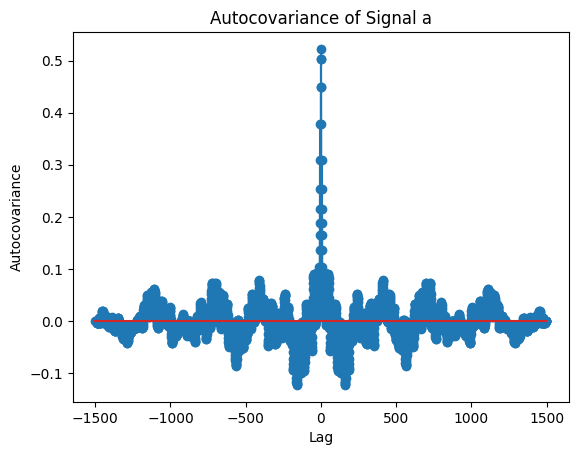

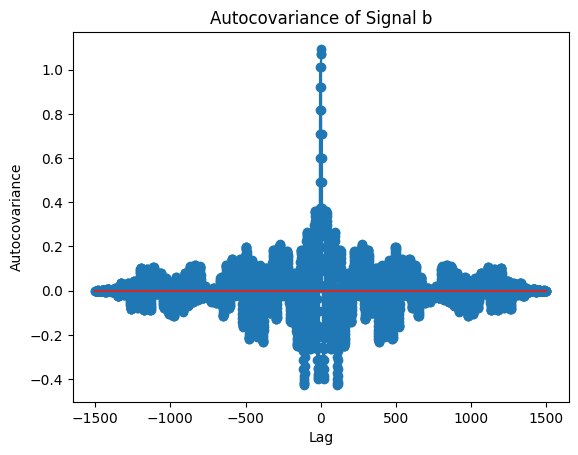

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt


data = loadmat('D:/computational_neuroscience/EEG_P2090.mat')
EEG = data['EEG_P2090_processed']

# Assuming EEG is a 2D array
a = EEG[0][0:1500]
b = EEG[27][3000:4500]

# Calculate autocovariance of signal a
autocovariance_a = np.correlate(a, a, mode='full') / len(a)

# Calculate autocovariance of signal b
autocovariance_b = np.correlate(b, b, mode='full') / len(b)

# Plot autocovariance of signal a
lag_values_a = np.arange(-len(a) + 1, len(a))
plt.stem(lag_values_a, autocovariance_a)
plt.title('Autocovariance of Signal a')
plt.xlabel('Lag')
plt.ylabel('Autocovariance')
plt.show()

# Plot autocovariance of signal b
lag_values_b = np.arange(-len(b) + 1, len(b))
plt.stem(lag_values_b, autocovariance_b)
plt.title('Autocovariance of Signal b')
plt.xlabel('Lag')
plt.ylabel('Autocovariance')
plt.show()

## Task 3

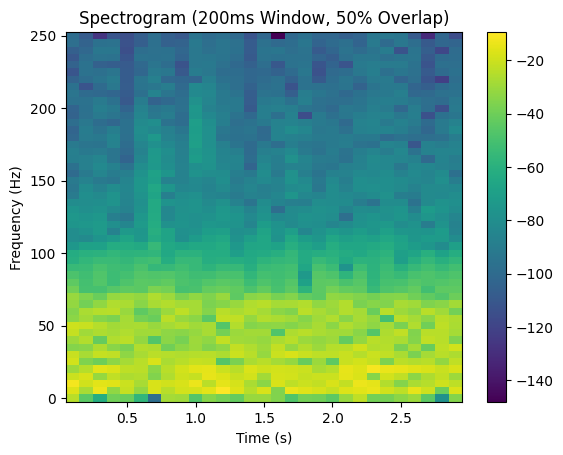

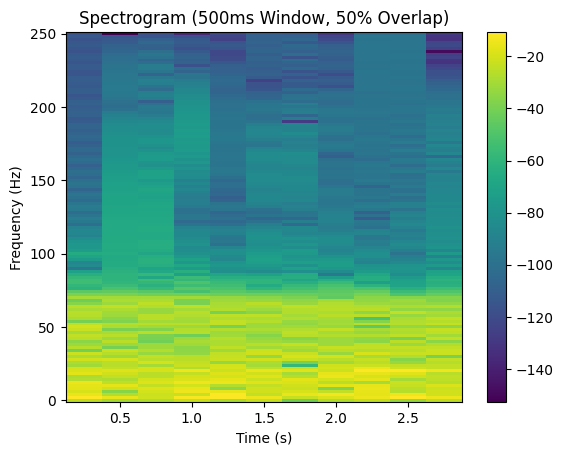

In [7]:
from scipy.signal import spectrogram

fs = 500

# Spectrogram for a 200ms window with proper overlap
nfft_200ms = int(0.2 * fs)  # 200ms window size
overlap_200ms = int(0.1 * fs)  # 50% overlap

freqs_200ms, times_200ms, Sxx_200ms = spectrogram(a, fs=fs, nperseg=nfft_200ms, noverlap=overlap_200ms)
plt.pcolormesh(times_200ms, freqs_200ms, 10 * np.log10(Sxx_200ms))
plt.title('Spectrogram (200ms Window, 50% Overlap)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.show()

# Spectrogram for a 500ms window with proper overlap
nfft_500ms = int(0.5 * fs)  # 500ms window size
overlap_500ms = int(0.25 * fs)  # 50% overlap

freqs_500ms, times_500ms, Sxx_500ms = spectrogram(a, fs=fs, nperseg=nfft_500ms, noverlap=overlap_500ms)
plt.pcolormesh(times_500ms, freqs_500ms, 10 * np.log10(Sxx_500ms))
plt.title('Spectrogram (500ms Window, 50% Overlap)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.show()